In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Sweden'

link = 'https://rally-base.com/2023/rally-sweden-2023/?ssId='
startat, no_ss=7337, int(18) # starting number of url, count of Special Stages

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,69,Rovanperä,RC1,00:03:23.3,91.37 0.00,00:00:00.0 00:00:00.0,1,Sweden,1
2,2,8,Tänak Ott,RC1,00:03:24.9,90.66 0.31,00:00:01.6 00:00:01.6,1,Sweden,2
3,3,33,Evans Elf,RC1,00:03:26.4,90.00 0.60,00:00:03.1 00:00:01.5,1,Sweden,3
4,4,4,Lappi Esa,RC1,00:03:27.2,89.65 0.76,00:00:03.9 00:00:00.8,1,Sweden,4
5,5,11,Neuville,RC1,00:03:28.3,89.18 0.97,00:00:05.0 00:00:01.1,1,Sweden,5
...,...,...,...,...,...,...,...,...,...,...
41,41,64,Otake Nao,RC4,00:07:07.8,84.82 8.51,00:01:25.8 00:00:01.3,18,Sweden,41
42,42,7,Loubet P.,RC1,00:08:10.6,73.95 14.74,00:02:28.6 00:01:02.8,18,Sweden,42
43,43,35,Al-Rashed,RC2,00:08:27.1,71.55 16.38,00:02:45.1 00:00:16.5,18,Sweden,43
44,44,26,Kaur Egon,RC2,00:08:56.6,67.61 19.31,00:03:14.6 00:00:29.5,18,Sweden,44


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                           Pos.                                              \
ss                            1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                      
4   Lappi  Esa RC1   Sweden    4   3   2   5   3   6   2   3   5   6   4   3   
7   Loubet  P. RC1   Sweden    8   7   8   8   2   7   7  20   8   8   8   7   
8   Tänak  Ott RC1   Sweden    2   2   4   3   4   3   1   2   6   4   3   2   
11  Neuville   RC1   Sweden    5   5   6   7   6   5   5   4   1   3   2   3   
18  Katsuta  T RC1   Sweden    6   4   3   1  21  47  45  44   7   7   5   6   
20  Solberg  O RC2   Sweden   11  13   9  11   7  11   9   7   9  12  11  12   
21  Veiby  O.  RC2   Sweden   10  14  11  17  19   9  13  10  10   9   9  11   
22  Lindholm   RC2   Sweden   12   9  48  16   8  14  10  12  16  11  20   9   
23  Suninen  T RC2   Sweden   14  10  13  13  45  12  12   8  14  13  14  16   
24  Huttunen   RC2   Sweden    9  12  15  15  13  16  16  10  12  17  12  49   
25  Linnamäe   RC2   Sweden   22  21  20  19  17  18  15  17  18  18  16  20   
26  Kaur  Egon RC2   Sweden   20  17  17  12  34  44  14   9  15  10  17  15   
27  Gryazin  N RC2   Sweden   15  18  12  14  14  13  17  21  20  14  14  10   
28  Pajari  Sa RC2   Sweden   12  11  16  10  12   8   8  16  13  23  13  12   
29  Virves  Ro RC2   Sweden   23  20  21  20  11  19  21  19  22  19  18  22   
30  Joona  Lau RC2   Sweden   19  22  18  21  16  10  18  14  21  20  19  18   
31  Bulacia  M RC2   Sweden   16  16  14  18  33  14  20  12  16  16  22  19   
32  Bulacia  B RC2   Sweden   16  23  22  22  15  17  22  15  18  21  21  17   
33  Evans  Elf RC1   Sweden    3   6   7   6   5   2   4   5   4   5   6  14   
34  Zaldivar   RC2   Sweden   21  19  19  23  18  20  19  18  42  22  23  21   
35  Al-Rashed  RC2   Sweden   30  29  33  32  20  24  25  45  32  31  27  26   
36  Sołowow  M RC2   Sweden   27  25  24  24  22  22  24  28  24  24  24  23   
37  Bertelli   RC1   Sweden   18  15  10   9  10  43  11  39  11  15  10   8   
38  Miele  Mau RC2   Sweden   32  36  35  38  28  29  32  42  36  38  36  29   
40  Alonso  Da RC2   Sweden   38  37  36  37  31  30  34  41  49  37  38  36   
41  Jonasson   RC2   Sweden   24  24  23  26  23  21  23  22  23  51  51  51   
42  Breen  Cra RC1   Sweden    7   1   5   4   1   1   3   6   3   1   7   5   
44  Cobbe  Luc RC2   Sweden   45  51  47  49  44  46  44  35  51  50  49  47   
45  Roman  Joa RC2   Sweden   40  47  38  39  38  40  46  45  47  47  45  44   
46  Zaldivar   RC2   Sweden   37  32  32  35  30  33  35  25  34  33  33  50   
47  Díaz Aboit RC2   Sweden   45  49  45  47  41  45  43  43  48  49  50  45   
48  Villanueva RC2   Sweden   42  35  29  30  48  26  26  31  26  32  34  24   
49  Korhonen   RC3   Sweden   26  27  25  25  26  23  31  27  25  29  25  25   
50  Creighton  RC3   Sweden   25  26  26  27  27  25  28  23  30  27  26  31   
51  Munster  G RC3   Sweden   33  31  27  34  32  26  29  30  27  25  29  48   
52  Pellier  L RC3   Sweden   36  28  31  31  24  28  27  29  28  28  30  28   
53  Herranen   RC3   Sweden   31  33  30  28  29  49  49  49  29  26  28  26   
54  Dominguez  RC3   Sweden   28  30  34  36  25  31  33  24  33  34  32  33   
55  Kallio  Je RC3   Sweden   29  38  28  29  51  32  30  26  31  30  31  30   
56  Kelly  Eam RC3   Sweden   34  34  41  33  35  51  48  47  37  35  37  32   
57  Kohn  Fili RC3   Sweden   35  43  51  51  50  49  49  49  35  36  39  35   
58  Hernández  RC3   Sweden   51  42  42  44  36  35  36  33  40  39  35  34   
59  Rensonnet  RC3   Sweden   39  46  49  43  38  34  37  32  41  44  40  38   
60  Blach  Rob RC3   Sweden   44  40  43  45  37  38  40  34  38  40  43  37   
61  Anwar  Ham RC3   Sweden   41  50  46  48  46  42  42  40  50  48  48  46   
62  García  J. RC2   Sweden   43  39  50  50  49  48  47  48  44  46  47  42   
63  Yamamoto   RC4   Sweden   48  44  39  42  42  39  38  36  43  42  42  39   


In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3660 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,69,Rovanperä,RC1,1,Sweden,1,203.3
2,8,Tänak Ott,RC1,1,Sweden,2,204.9
3,33,Evans Elf,RC1,1,Sweden,3,206.4
4,4,Lappi Esa,RC1,1,Sweden,4,207.2
5,11,Neuville,RC1,1,Sweden,5,208.3
...,...,...,...,...,...,...,...
41,64,Otake Nao,RC4,18,Sweden,41,427.8
42,7,Loubet P.,RC1,18,Sweden,42,490.6
43,35,Al-Rashed,RC2,18,Sweden,43,507.1
44,26,Kaur Egon,RC2,18,Sweden,44,536.6


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race   ss          
Sweden 1      203.3
       2      384.8
       3      388.3
       4      720.0
       5      385.1
       6      395.0
       7      722.3
       8      208.1
       9      320.2
       10     731.5
       11     487.2
       12     323.6
       13     730.0
       14     501.8
       15     349.2
       16     761.0
       17     757.0
       18     342.0

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3
...,...,...,...,...,...,...,...,...
898,64,Otake Nao,RC4,18,Sweden,41,427.8,342.0
899,7,Loubet P.,RC1,18,Sweden,42,490.6,342.0
900,35,Al-Rashed,RC2,18,Sweden,43,507.1,342.0
901,26,Kaur Egon,RC2,18,Sweden,44,536.6,342.0


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3,1.6,0.787014,01
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3,3.1,1.524840,01
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3,3.9,1.918347,01
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3,5.0,2.459420,01
...,...,...,...,...,...,...,...,...,...,...,...
898,64,Otake Nao,RC4,18,Sweden,41,427.8,342.0,85.8,25.087719,18
899,7,Loubet P.,RC1,18,Sweden,42,490.6,342.0,148.6,43.450292,18
900,35,Al-Rashed,RC2,18,Sweden,43,507.1,342.0,165.1,48.274854,18
901,26,Kaur Egon,RC2,18,Sweden,44,536.6,342.0,194.6,56.900585,18


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3,1.6,0.787014,01
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3,3.1,1.524840,01
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3,3.9,1.918347,01
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3,5.0,2.459420,01
...,...,...,...,...,...,...,...,...,...,...,...
861,8,Tänak Ott,RC1,18,Sweden,4,342.7,342.0,0.7,0.204678,18
862,42,Breen Cra,RC1,18,Sweden,5,342.9,342.0,0.9,0.263158,18
863,11,Neuville,RC1,18,Sweden,6,344.7,342.0,2.7,0.789474,18
866,37,Bertelli,RC1,18,Sweden,9,359.8,342.0,17.8,5.204678,18


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3,1.6,0.787014,01
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3,3.1,1.524840,01
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3,3.9,1.918347,01
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3,5.0,2.459420,01
...,...,...,...,...,...,...,...,...,...,...,...
861,8,Tänak Ott,RC1,18,Sweden,4,342.7,342.0,0.7,0.204678,18
862,42,Breen Cra,RC1,18,Sweden,5,342.9,342.0,0.9,0.263158,18
863,11,Neuville,RC1,18,Sweden,6,344.7,342.0,2.7,0.789474,18
866,37,Bertelli,RC1,18,Sweden,9,359.8,342.0,17.8,5.204678,18


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Sweden                                                           \
SS.            01    02    03    04    05     06     07     08    09    10   
Crew                                                                         
Bertelli     14.2  27.4  24.3  36.9  21.9  103.9   46.3   53.4  22.0  50.9   
Breen  Cra    6.7   0.0   2.8   0.7   0.0    0.0    4.1    4.3   1.4   0.0   
Evans  Elf    3.1   9.7   5.4   5.4  10.1    2.6    5.9    2.9   2.9   4.8   
Katsuta  T    5.6   7.9   1.7   0.0  48.4  600.0  600.0  600.0   4.5  11.6   
Lappi  Esa    3.9   5.4   1.0   1.9   8.5    6.8    0.9    1.4   3.0   6.7   
Loubet  P.   10.8  10.7  10.0  13.6   7.8    9.6   17.3   15.0  11.2  27.7   
Neuville      5.0   8.4   4.4   7.3  14.6    5.8    7.4    2.5   0.0   1.0   
Rovanperä     0.0  12.5   0.0   0.3  21.3    4.3   11.3    0.0   1.1   0.8   
Tänak  Ott    1.6   3.8   2.2   0.5   9.8    2.8    0.0    0.5   3.4   1.1   

Race                                                          
SS.           11    12     13    14    15    16    17     18  
Crew                                                          
Bertelli    29.1  16.2   44.2  33.5  26.7  57.8  53.6   17.8  
Breen  Cra   4.1   1.5    4.1   3.6  10.3   4.5   3.8    0.9  
Evans  Elf   3.9  19.4    4.5   5.6   6.5  16.2  18.6    0.6  
Katsuta  T   2.5   4.2    8.2  15.1   3.6  11.2  11.4    NaN  
Lappi  Esa   1.6   1.0  436.1   0.2   3.0   8.4  16.7    0.0  
Loubet  P.   9.4   8.2   11.3  14.0   6.5  39.8  31.6  148.6  
Neuville     1.3   1.0    0.0   0.0   0.0   2.7   0.0    2.7  
Rovanperä    0.0   0.0    3.4   3.7   3.8   0.0   6.0    0.7  
Tänak  Ott   1.4   0.2    2.9   0.8   4.0   1.5   6.9    0.7

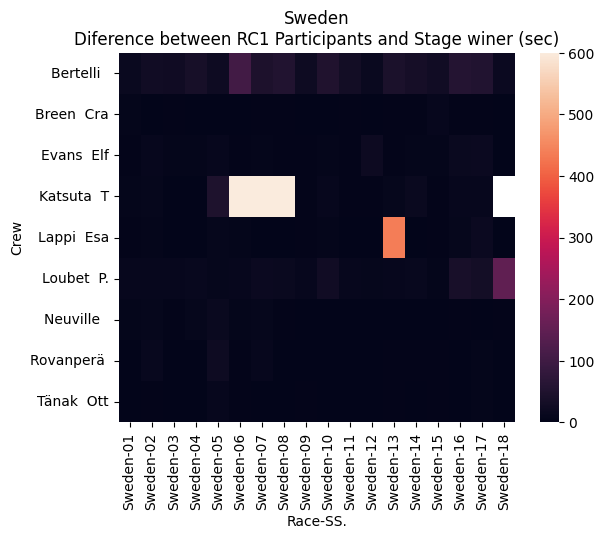

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

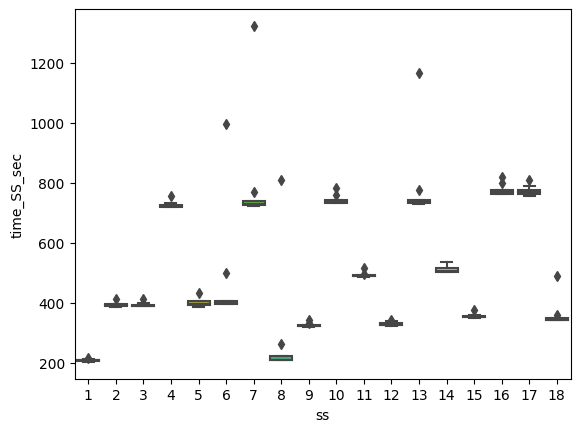

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

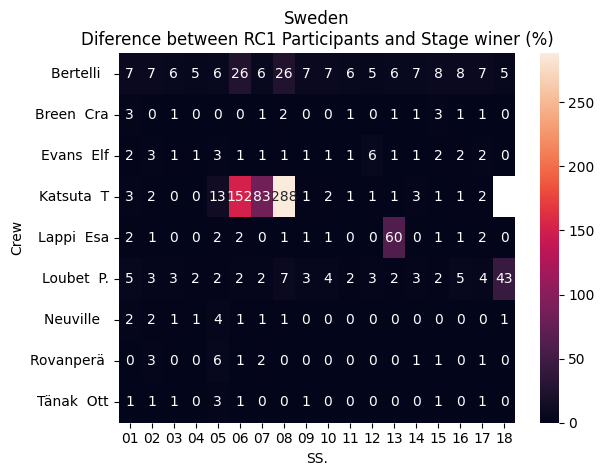

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")